# Logistic Regression with a Neural Network

In this notebook, we will build a logistic Regression classifier.

Table of Contents :

- 1 - Recap of Logistic Regression Formulas
    - 1.1 - Formulas
    - 1.2 - Building the parts of the algorithm
    
- 2 - Example with a simple dataset 
    - 2.1 - Training of our model
    - 2.2 - Gradient Descent Visualization

- 3 - Cat Classifier

# 1 - Recap : Logistic Regression

The logistic Regression is actually a very simple Neural Network as you can see in the following picture. In this example we have an example of a picture of a cat. The pixels represents the input features. And the algorithm will predict if the picture is a cat or not.

<center><img src="images/02-logistic regression with NN/pixel-image-NN.PNG" width = "600px"></center>

## 1.1 - Formulas

> m examples with n features by example


$$X=\begin{bmatrix} x^{(1)}_1 & x^{(2)}_1 .. & .. & x^{(m)}_1 \\ x^{(1)}_2 & x^{(2)}_2 .. & .. & x^{(m)}_2 \\. & . & . & .\\. & . & . & . \\ x^{(1)}_n & x^{(2)}_n .. & .. & x^{(m)}_n\end{bmatrix} = \begin{bmatrix}  X^{(1)} &  X^{(2)} & .. & .. &  X^{(m)} \end{bmatrix}  \in  \mathbb{R^{n \times m}}$$  


$$W=\begin{bmatrix} w_1 \\ w_2 \\ .. \\ .. \\ .. \\ w_n \end{bmatrix} \in  \mathbb{R^{n \times 1}}$$  

$$y =\begin{bmatrix} y_1 & y_2 & .. & .. & y_n\end{bmatrix} \in  \mathbb{R^{1 \times m}}$$ 

$$ b \in  \mathbb{R}$$  





> Implementation of the model : 

$$ 
    \begin{cases}
    Z = W^T X + b \\
    A = \sigma (Z) = \frac{1}{1+\exp^{-Z}}
    \end{cases}
$$

> Cost function :

 $$ J = - \frac{1}{m} \sum y \times \log(A) + (1-y) \times \log(1-A)$$

> Gradient Descent :

$$ 
    \begin{cases}
    W = W - \alpha \frac{\partial{J}}{\partial{W}}\\
    b = b - \alpha \frac{\partial{J}}{\partial{b}} \\
    \frac{\partial{J}}{\partial{W}} = \frac{1}{m} X (A-Y)^T\\
    \frac{\partial{J}}{\partial{b}} = \frac{1}{m} \sum (A-Y)
    \end{cases}
$$

## 1.2 - Building the parts of our model

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop :
    - <b>Forward Propagation</b> - Calculate current loss
    - <b>Backward Propagation</b> - Calculate current gradient
    - <b>Gradient Descent</b> - Update parameters

In [60]:
# Import

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

#### Initializing parameters

In [2]:
def initialize(dimension):

    """
    Initializing the parameters W and b to 0

    """

    w = np.zeros((dimension,1))
    b = 0

    return w,b

#### Sigmoid Function

In [42]:
def sigmoid(Z):
    """
    Compute the sigmoid of Z
    """

    sig = 1 / (1+np.exp(-Z))

    return sig


#### Gradient

In [41]:
def gradient(X,y,A,m):

    """
    Compute the gradient 

    X - input
    y - label
    A- Activation / Sigmoid (model)

    """
    
    # Gradient
    dw = (1/m) * np.dot(X,(A-y).T)
    db = (1/m) * np.sum(A-y)

    return dw, db

#### Update Gradient

In [40]:
def update_param(w,b,dw,db, learning_rate = 0.01):
    """
    This function updates the parameters w and b with the gradient
    """

    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w,b

#### Loss function

In [39]:
def cost_func(A,y,m):
    """
    This function computes the loss function 
    """

    cost = -(1/m) * np.sum(y*np.log(A) + (1-y) * np.log(1-A))

    return cost

#### predict

In [81]:
def predict(X,w,b):

    """
    Model prediction

    X - Input
    w,b - parameters
    """

    # compute activation
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)

    # predict
    A[A>=0.5] = 1
    A[A<0.5] = 0

    return A

#### model

In [147]:
def model(X,y,num_iter = 200, learning_rate = 0.01):

    """
    Builds the logistic Regression model by calling the function we've implemented previously
    
    """ 
    # Loss list
    Loss_train = []

    # Accuracy 
    Acc_train = []

    dimension = X.shape[0]
    m = X.shape[1]


    # Initialize parameters w and b
    w,b = initialize(dimension)


    # Optimization
    for i in range(num_iter):

        # Activation
        Z = np.dot(w.T,X) + b
        A = sigmoid(Z)

        # Gradient
        dw,db = gradient(X,y, A,m)

        # Cost function
        cost = cost_func(A,y,m)

        # Accuracy
        y_pred = predict(X,w,b)
        acc = accuracy_score(y.T,y_pred.T)
        
        Loss_train.append(cost)
        Acc_train.append(acc)

        # Update Params
        w,b = update_param(w,b,dw,db,learning_rate)


        # Display the optimization
        if i%50 == 0:
            print(f"Iter {i} : Train_Loss = {cost}, Train_acc = {acc}")

    return {"params":{"w":w,"b":b},"Loss":Loss_train,"Accuracy":Acc_train}


# 2. Example on a simple dataset

In [107]:
from sklearn.datasets import make_blobs

In [108]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state =0)

In [109]:
print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (100, 2)
Y shape: (100,)


In [110]:
# Reshape de y 
X = X
y = y.reshape((X.shape[0],1))


print("X shape:",X.shape)
print("Y shape:",y.shape)

X shape: (100, 2)
Y shape: (100, 1)


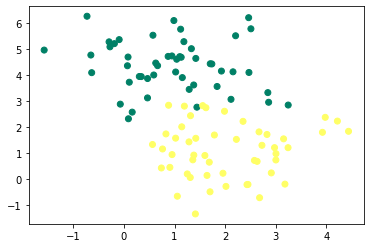

In [111]:
# Visualization of the example

plt.scatter( X[:,0],X[:,1], c=y,cmap="summer")
plt.show()

## 2.1 - Training our model

In this example we have :
- X.shape : 100,2 (100 examples, 2 features)
- y.shape : 100,1

So for our model we need to take X.T and y.T 

In [129]:
result = model(X.T,y.T,num_iter = 500, learning_rate = 0.01)

Iter 0 : Train_Loss = 0.6931471805599453, Train_acc = 0.5
Iter 50 : Train_Loss = 0.5075400099523365, Train_acc = 0.82
Iter 100 : Train_Loss = 0.4300955349899871, Train_acc = 0.85
Iter 150 : Train_Loss = 0.38257886868727115, Train_acc = 0.88
Iter 200 : Train_Loss = 0.3505544747818968, Train_acc = 0.87
Iter 250 : Train_Loss = 0.32765342901883066, Train_acc = 0.87
Iter 300 : Train_Loss = 0.31051019285109177, Train_acc = 0.87
Iter 350 : Train_Loss = 0.29720353473785804, Train_acc = 0.87
Iter 400 : Train_Loss = 0.2865692829768506, Train_acc = 0.87
Iter 450 : Train_Loss = 0.2778657320144529, Train_acc = 0.88


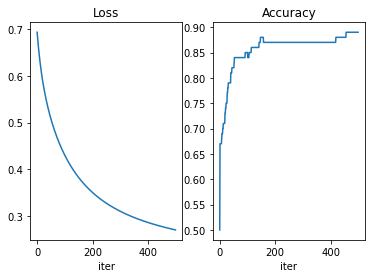

In [131]:
# Display 

fig, ax = plt.subplots(1,2)
ax[0].plot(result['Loss'])
ax[0].set_xlabel("iter")
ax[0].set_title("Loss")

ax[1].plot(result['Accuracy'])
ax[1].set_xlabel("iter")
ax[1].set_title("Accuracy")
plt.show()

#### Different learning Rate

Iter 0 : Train_Loss = 0.6931471805599453, Train_acc = 0.5
Iter 50 : Train_Loss = 0.26968697631947913, Train_acc = 0.89
Iter 100 : Train_Loss = 0.23289154963695535, Train_acc = 0.89
Iter 150 : Train_Loss = 0.2171527365237731, Train_acc = 0.89
Iter 200 : Train_Loss = 0.2072973643126416, Train_acc = 0.9
Iter 250 : Train_Loss = 0.1999546394152538, Train_acc = 0.91
Iter 300 : Train_Loss = 0.19396237555402487, Train_acc = 0.92
Iter 350 : Train_Loss = 0.18881631543131958, Train_acc = 0.92
Iter 400 : Train_Loss = 0.184262405830839, Train_acc = 0.92
Iter 450 : Train_Loss = 0.18015761620706616, Train_acc = 0.92
Iter 0 : Train_Loss = 0.6931471805599453, Train_acc = 0.5
Iter 50 : Train_Loss = 0.5075400099523365, Train_acc = 0.82
Iter 100 : Train_Loss = 0.4300955349899871, Train_acc = 0.85
Iter 150 : Train_Loss = 0.38257886868727115, Train_acc = 0.88
Iter 200 : Train_Loss = 0.3505544747818968, Train_acc = 0.87
Iter 250 : Train_Loss = 0.32765342901883066, Train_acc = 0.87
Iter 300 : Train_Loss = 0.3

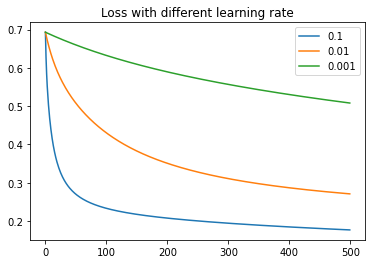

In [134]:
learning_rate = [0.1,0.01,0.001]

plt.figure()

for alpha in learning_rate:
    result = model(X.T,y.T,num_iter = 500, learning_rate = alpha)
    plt.plot(result['Loss'])

plt.title('Loss with different learning rate')
plt.legend(['0.1','0.01','0.001'])


## 2.2 - Gradient visualization

In [135]:
!pip install plotly

In [155]:
lim = 10
h = 100
W1 = np.linspace(-lim,lim,h)
W2 = np.linspace(-lim,lim,h)

W11, W22 = np.meshgrid(W1,W2)

W_final = np.c_[W11.ravel(),W22.ravel()].T
W_final.shape

(2, 10000)

In [160]:
# small example 

# initialize and activation
b = 0
Z = X.dot(W_final) + b
A = 1/(1+np.exp(-Z))

# cost 

epsilon = 1e-15
L = (1/len(y)) * np.sum(-y * np.log(A+epsilon) - (1-y)*np.log(1-A+epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

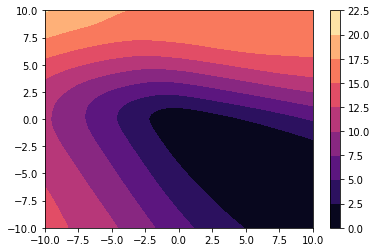

In [161]:
plt.figure(1)
plt.contourf(W11,W22,L,cmap='magma')
plt.colorbar()

In [220]:
# test visualization gradient descent

def model_visualization(X,y,num_iter = 200, learning_rate = 0.01):

    # Loss list
    history = {"w1":[],"w2":[],"Loss":[]}

    # Accuracy 
    Acc_train = []

    dimension = X.shape[0]
    m = X.shape[1]


    # Initialize parameters w and b
    w,b = initialize(dimension)
    
    w[0] = - 7.5
    w[1] = -7.5

    print(w)
    # Optimization
    for i in range(num_iter):

        # Activation
        Z = np.dot(w.T,X) + b
        A = sigmoid(Z)

        # Gradient
        dw,db = gradient(X,y, A,m)

        # Cost function
        cost = cost_func(A,y,m)
        history["Loss"].append(cost)


        # Update Params
        w,b = update_param(w,b,dw,db,learning_rate)

        history["w1"].append(w[0,0])
        history["w2"].append(w[1,0])

    return history


In [226]:
history = model_visualization(X.T,y.T,num_iter = 500, learning_rate = 0.1)

[[-7.5]
 [-7.5]]


In [227]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = W11, 
                                 y = W22,
                                 z= L)])

fig.update_layout(template= "plotly_dark", 
                  title='Loss - W11 and W22', 
                  scene = dict(
                    xaxis_title='W11',
                    yaxis_title='W22',
                    zaxis_title='Loss'),
                  width=500, 
                  height=500)     

fig.add_scatter3d(x=history["w1"],
                  y=history["w2"],
                  z = history['Loss'], mode='markers', 
                  marker=dict(size=5, color="red",         
                              colorscale='Reds')) 

fig.show()